=== Exercício 4A: MNIST ===


100%|██████████| 9.91M/9.91M [00:00<00:00, 46.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 35.6MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 35.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.57MB/s]



=== Análise do MNIST Train ===
Tamanho total: 60000
Formato das imagens: torch.Size([1000, 1, 28, 28])
Tipo de dados: torch.float32
Valor mínimo: -0.4242
Valor máximo: 2.8215
Média: -0.0080
Desvio padrão: 0.9904
Número de classes únicas: 10
Distribuição de classes: tensor([ 97, 116,  99,  93, 105,  92,  94, 117,  87, 100])


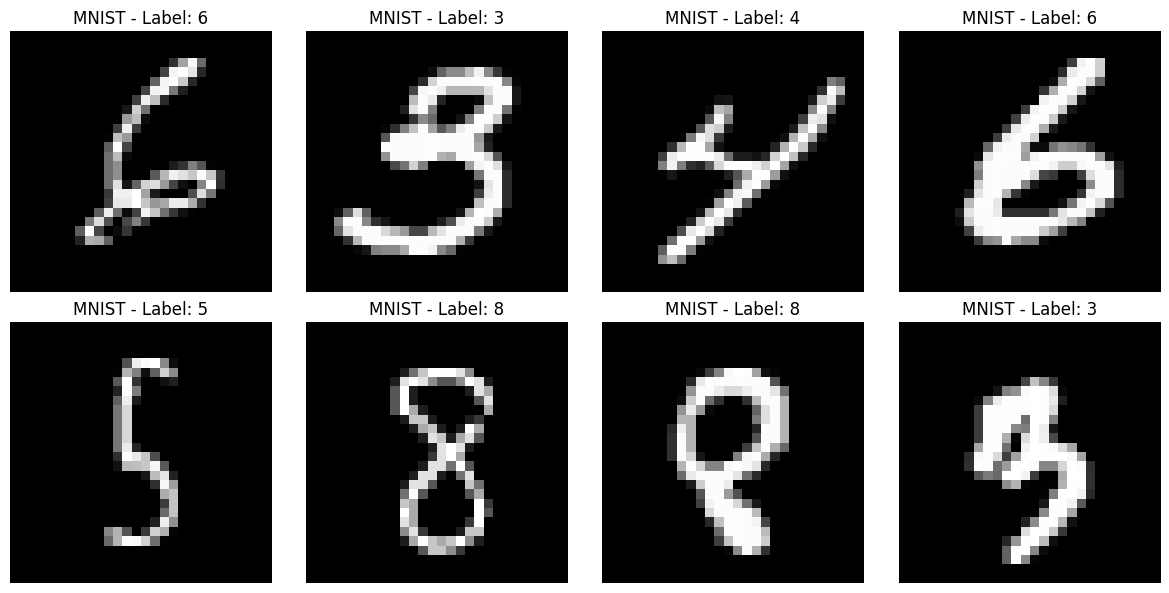


=== Exercício 4B: Fashion-MNIST ===


100%|██████████| 26.4M/26.4M [00:01<00:00, 21.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 337kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.22MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.18MB/s]



=== Análise do Fashion-MNIST ===
Tamanho total: 60000
Formato das imagens: torch.Size([1000, 1, 28, 28])
Tipo de dados: torch.float32
Valor mínimo: -0.4242
Valor máximo: 2.8215
Média: 0.4940
Desvio padrão: 1.1460
Número de classes únicas: 10
Distribuição de classes: tensor([107, 104,  86,  92,  95, 100, 100, 115, 102,  99])


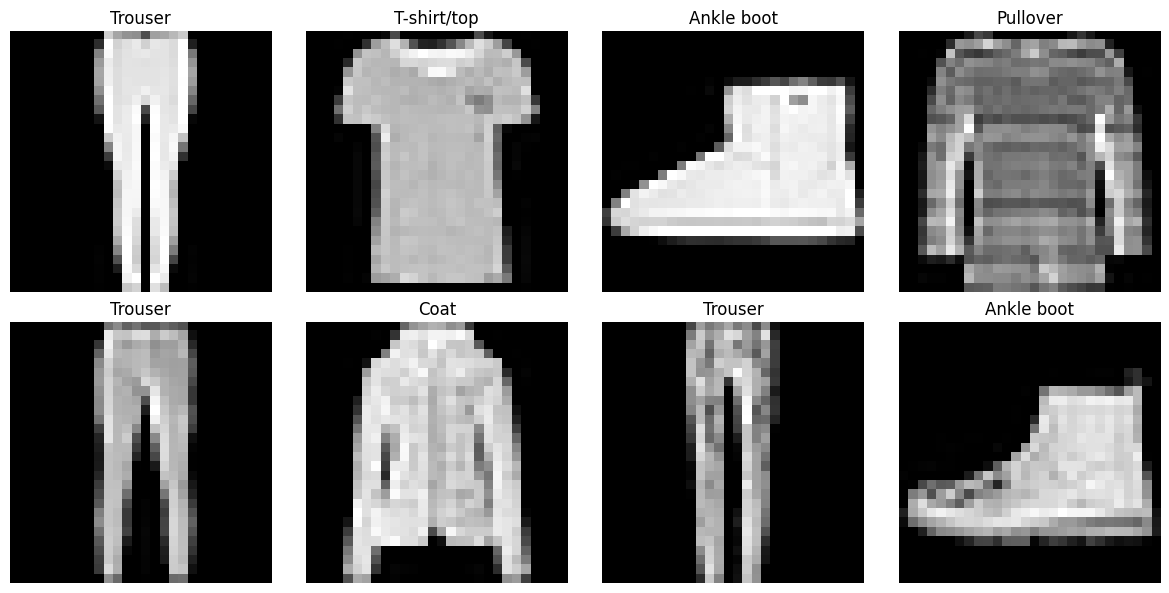


=== Exercício 4C: Efeito das Transformações ===


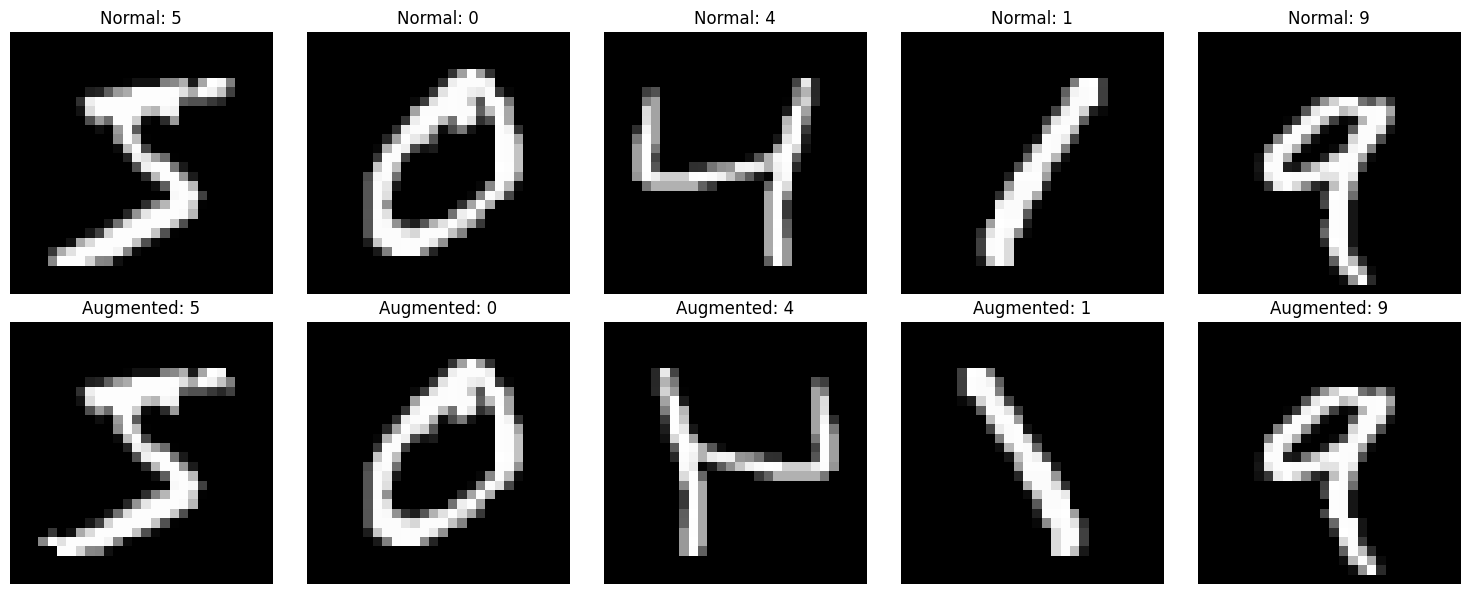

In [ ]:
# Instalar torchvision se necessário
# !pip install torchvision

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Função para visualizar batch
def visualize_batch(dataloader, num_samples=8, dataset_name="Dataset"):
    dataiter = iter(dataloader)
    images, labels = next(dataiter)

    # Calcular grid
    cols = 4
    rows = (num_samples + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 3*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)

    for i in range(num_samples):
        row = i // cols
        col = i % cols

        img = images[i]
        label = labels[i]

        # Processar imagem para visualização
        if img.shape[0] == 1:  # Grayscale
            img = img.squeeze()
            cmap = 'gray'
        else:  # RGB
            img = img.permute(1, 2, 0)
            cmap = None
            # Desnormalizar se necessário
            if img.min() < 0:
                img = (img * 0.5) + 0.5

        axes[row, col].imshow(img, cmap=cmap)
        axes[row, col].set_title(f'{dataset_name} - Label: {label.item()}')
        axes[row, col].axis('off')

    # Ocultar eixos não utilizados
    for i in range(num_samples, rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Análise de dataset
def analyze_dataset(dataset, name="Dataset", num_samples=1000):
    print(f"\n=== Análise do {name} ===")
    print(f"Tamanho total: {len(dataset)}")

    # Coletar algumas amostras para análise
    sample_size = min(num_samples, len(dataset))
    images = []
    labels = []

    for i in range(sample_size):
        img, label = dataset[i]
        images.append(img)
        labels.append(label)

    images = torch.stack(images)
    labels = torch.tensor(labels)

    print(f"Formato das imagens: {images.shape}")
    print(f"Tipo de dados: {images.dtype}")
    print(f"Valor mínimo: {images.min():.4f}")
    print(f"Valor máximo: {images.max():.4f}")
    print(f"Média: {images.mean():.4f}")
    print(f"Desvio padrão: {images.std():.4f}")
    print(f"Número de classes únicas: {len(torch.unique(labels))}")
    print(f"Distribuição de classes: {torch.bincount(labels)}")

# Exercício 4A: MNIST
print("=== Exercício 4A: MNIST ===")
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

mnist_train = datasets.MNIST('./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('./data', train=False, download=True, transform=transform)

analyze_dataset(mnist_train, "MNIST Train")

train_loader = DataLoader(mnist_train, batch_size=32, shuffle=True)
visualize_batch(train_loader, dataset_name="MNIST")

# Exercício 4B: Fashion-MNIST
print("\n=== Exercício 4B: Fashion-MNIST ===")
fashion_mnist = datasets.FashionMNIST('./data', train=True, download=True, transform=transform)

# Classes do Fashion-MNIST
fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

analyze_dataset(fashion_mnist, "Fashion-MNIST")

fashion_loader = DataLoader(fashion_mnist, batch_size=32, shuffle=True)

# Visualização com nomes das classes
dataiter = iter(fashion_loader)
images, labels = next(dataiter)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i in range(8):
    img = images[i].squeeze()
    label = labels[i].item()

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'{fashion_classes[label]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Exercício 4C: Comparação de Transformações
print("\n=== Exercício 4C: Efeito das Transformações ===")

# Transformação para treino (com augmentação)
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Transformação para teste (sem augmentação)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Carregar o mesmo dataset com diferentes transformações
mnist_augmented = datasets.MNIST('./data', train=True, transform=train_transform)
mnist_normal = datasets.MNIST('./data', train=True, transform=test_transform)

# Comparar mesmo índice com/sem augmentação
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Imagem normal
    img_normal, label_normal = mnist_normal[i]
    img_normal = img_normal.squeeze()
    axes[0, i].imshow(img_normal, cmap='gray')
    axes[0, i].set_title(f'Normal: {label_normal}')
    axes[0, i].axis('off')

    # Imagem com augmentação
    img_aug, label_aug = mnist_augmented[i]
    img_aug = img_aug.squeeze()
    axes[1, i].imshow(img_aug, cmap='gray')
    axes[1, i].set_title(f'Augmented: {label_aug}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()